<a href="https://colab.research.google.com/github/jasmehla/INTERNSHIP_TASKS_colab/blob/main/SCT_DS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predict Customer Purchase Using Decision Tree Classifier

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [5]:
import pandas as pd
# Load dataset (adjust filename if needed)
df = pd.read_csv("bank.csv", sep=';')
# Preview
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns
# Encode categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8806629834254144
Confusion Matrix:
 [[748  59]
 [ 49  49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



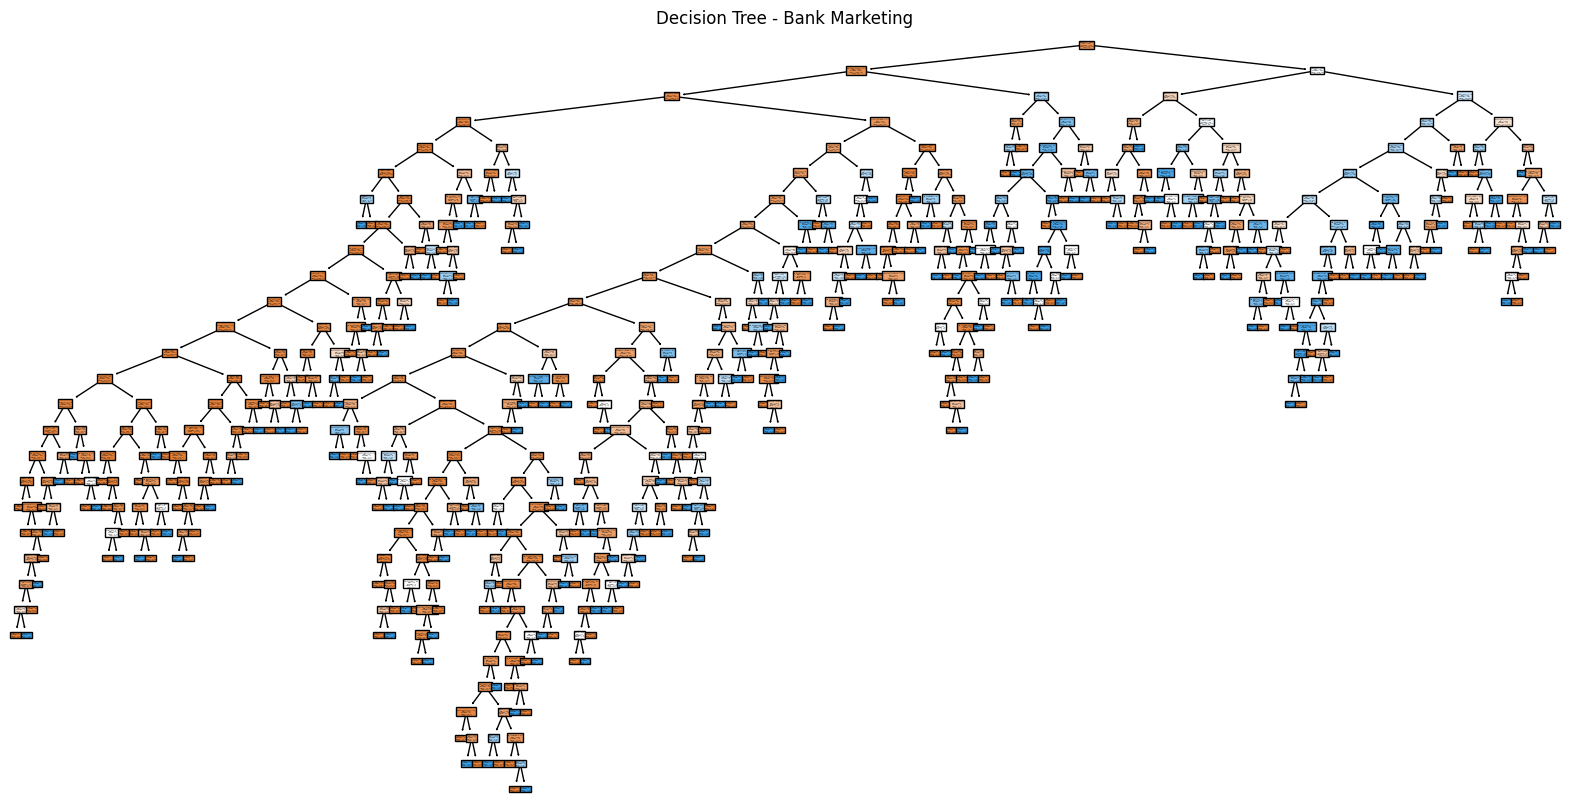

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree - Bank Marketing")
plt.show()

In [ ]:
import joblib

joblib.dump(model, 'decision_tree_bank_model.pkl')
